In [6]:
import pandas as pd

In [7]:
file_path = 'global_education_data.csv'

In [8]:
try:
    df = pd.read_csv(file_path, encoding='utf-8')  
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='ISO-8859-1') 

In [9]:
print(df.head())

  Countries and areas  Latitude   Longitude  OOSR_Pre0Primary_Age_Male  \
0         Afghanistan  33.939110  67.709953                          0   
1             Albania  41.153332  20.168331                          4   
2             Algeria  28.033886   1.659626                          0   
3             Andorra  42.506285   1.521801                          0   
4              Angola  11.202692  17.873887                         31   

   OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
0                            0                      0   
1                            2                      6   
2                            0                      0   
3                            0                      0   
4                           39                      0   

   OOSR_Primary_Age_Female  OOSR_Lower_Secondary_Age_Male  \
0                        0                              0   
1                        3                              6   
2                        0   

In [10]:
print(df.dtypes)

Countries and areas                         object
Latitude                                   float64
Longitude                                  float64
OOSR_Pre0Primary_Age_Male                    int64
OOSR_Pre0Primary_Age_Female                  int64
OOSR_Primary_Age_Male                        int64
OOSR_Primary_Age_Female                      int64
OOSR_Lower_Secondary_Age_Male                int64
OOSR_Lower_Secondary_Age_Female              int64
OOSR_Upper_Secondary_Age_Male                int64
OOSR_Upper_Secondary_Age_Female              int64
Completion_Rate_Primary_Male                 int64
Completion_Rate_Primary_Female               int64
Completion_Rate_Lower_Secondary_Male         int64
Completion_Rate_Lower_Secondary_Female       int64
Completion_Rate_Upper_Secondary_Male         int64
Completion_Rate_Upper_Secondary_Female       int64
Grade_2_3_Proficiency_Reading                int64
Grade_2_3_Proficiency_Math                   int64
Primary_End_Proficiency_Reading

In [11]:
print(df.isnull().sum())

Countries and areas                        0
Latitude                                   0
Longitude                                  0
OOSR_Pre0Primary_Age_Male                  0
OOSR_Pre0Primary_Age_Female                0
OOSR_Primary_Age_Male                      0
OOSR_Primary_Age_Female                    0
OOSR_Lower_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Upper_Secondary_Age_Female            0
Completion_Rate_Primary_Male               0
Completion_Rate_Primary_Female             0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Lower_Secondary_Female     0
Completion_Rate_Upper_Secondary_Male       0
Completion_Rate_Upper_Secondary_Female     0
Grade_2_3_Proficiency_Reading              0
Grade_2_3_Proficiency_Math                 0
Primary_End_Proficiency_Reading            0
Primary_End_Proficiency_Math               0
Lower_Secondary_End_Proficiency_Reading    0
Lower_Seco

In [10]:
# Summary statistics for numerical columns
print(df.describe())

        Latitude    Longitude  OOSR_Pre0Primary_Age_Male  \
count  202.000000  202.000000                 202.000000   
mean    25.081422   55.166928                  19.658416   
std     16.813639   45.976287                  25.007604   
min      0.023559    0.824782                   0.000000   
25%     11.685062   18.665678                   0.000000   
50%     21.207861   43.518091                   9.000000   
75%     39.901792   77.684945                  31.000000   
max     64.963051  178.065032                  96.000000   

       OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
count                   202.000000             202.000000   
mean                     19.282178               5.282178   
std                      25.171147               9.396442   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       7.000000               1.000000   
75%                      30.0000

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

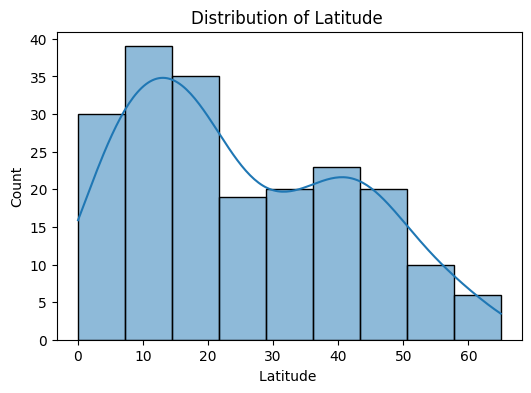

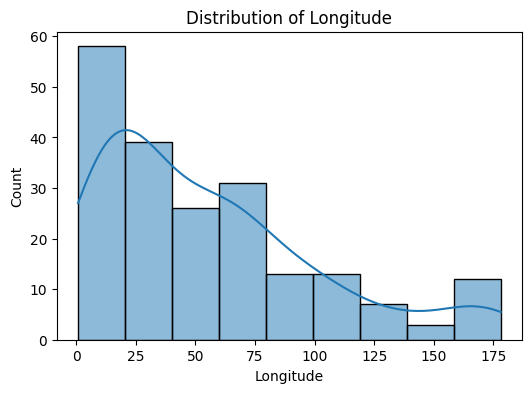

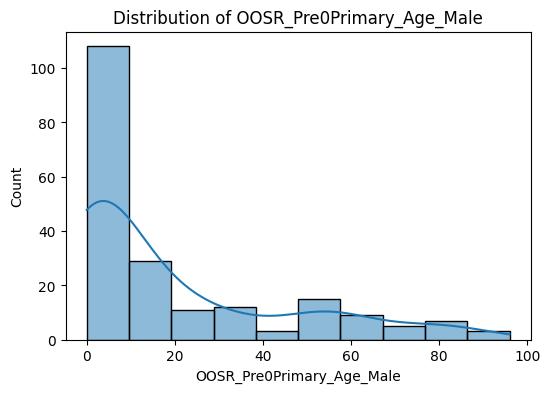

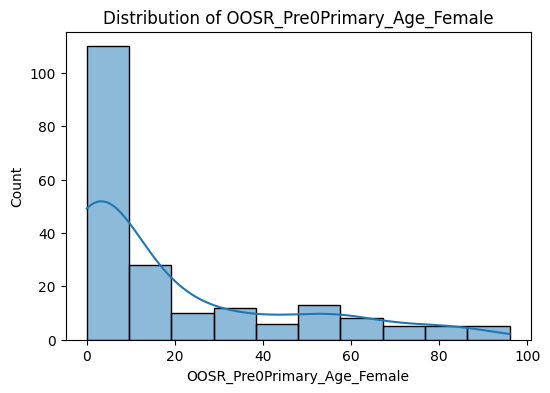

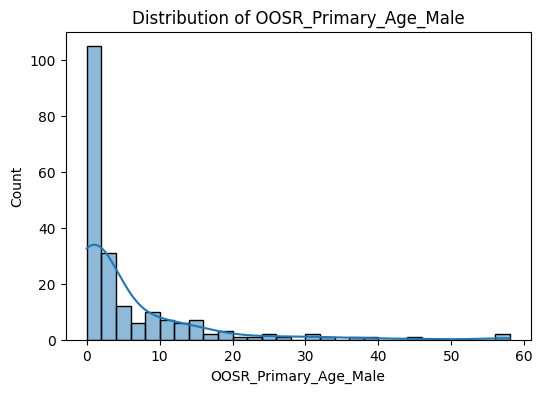

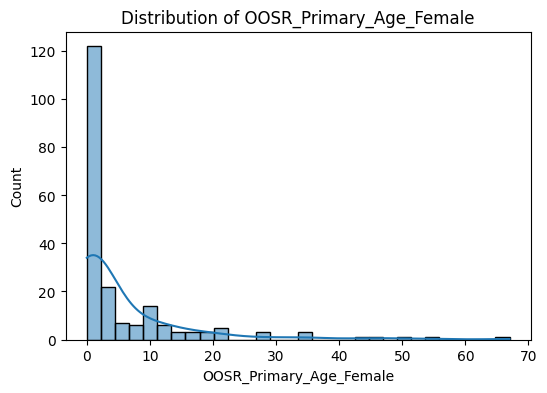

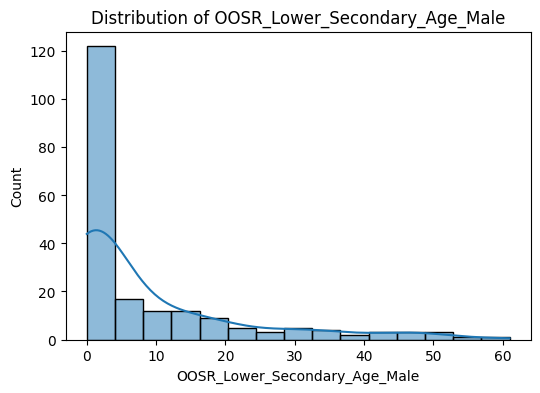

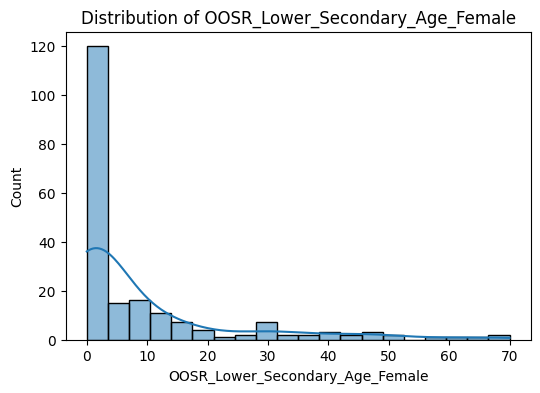

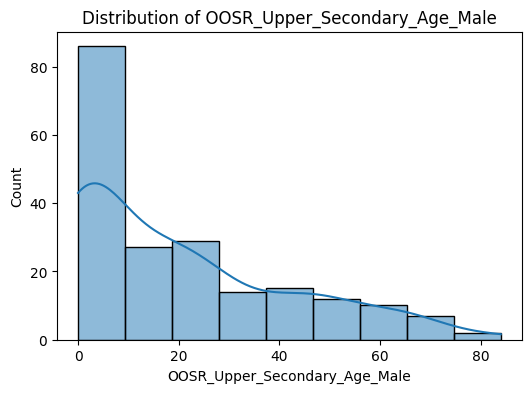

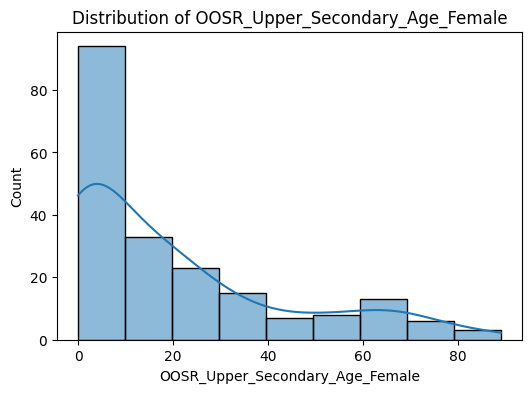

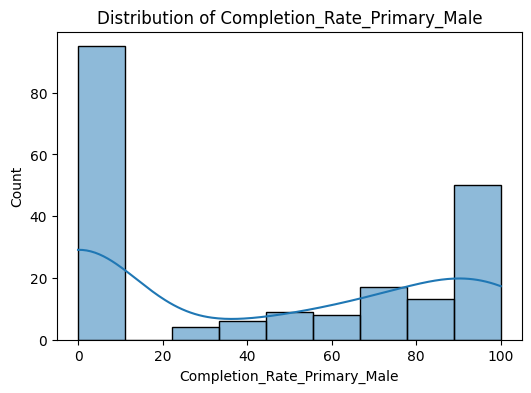

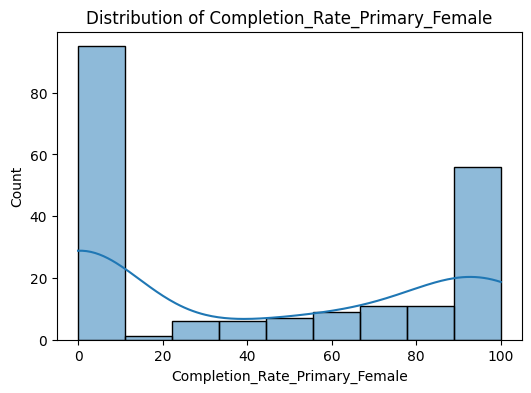

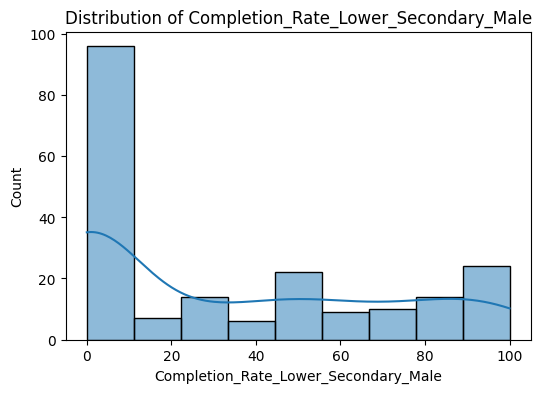

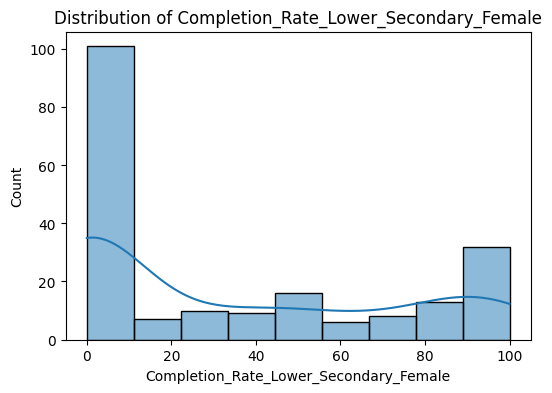

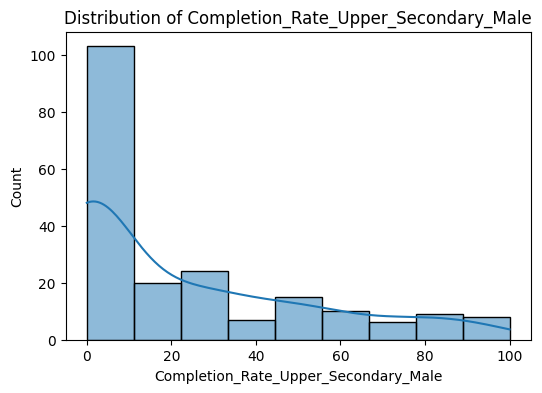

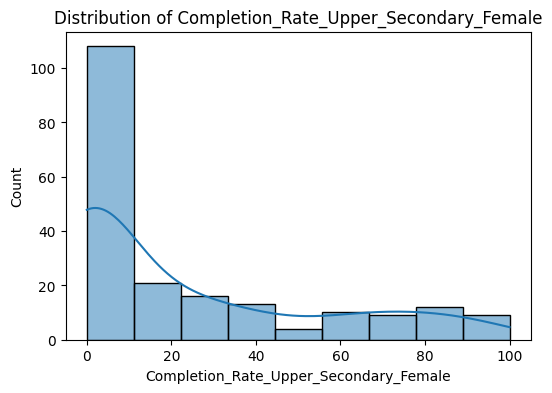

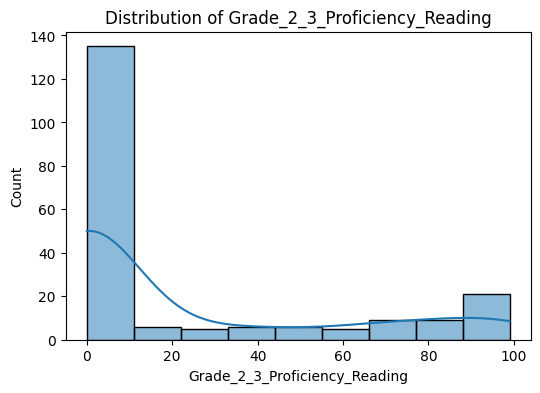

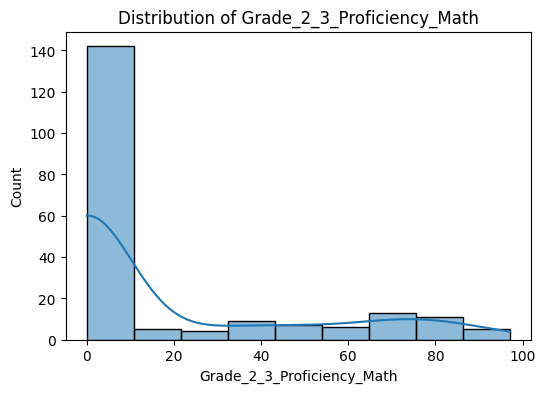

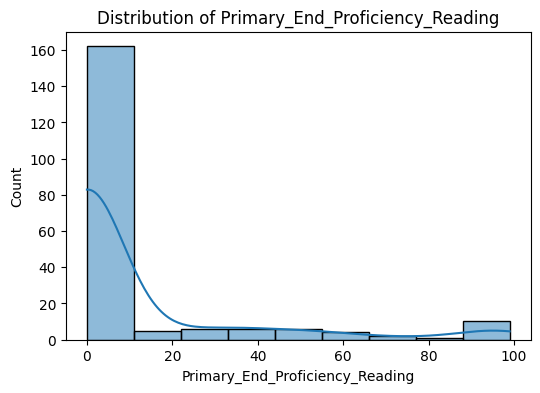

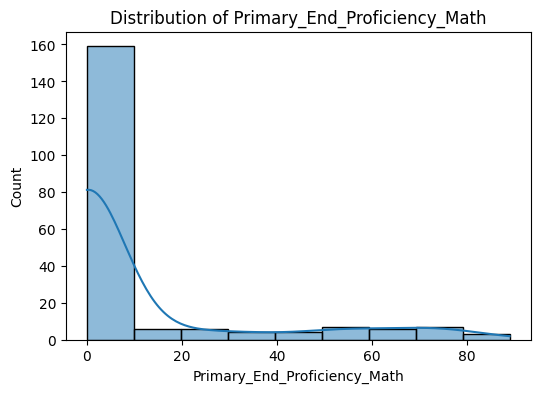

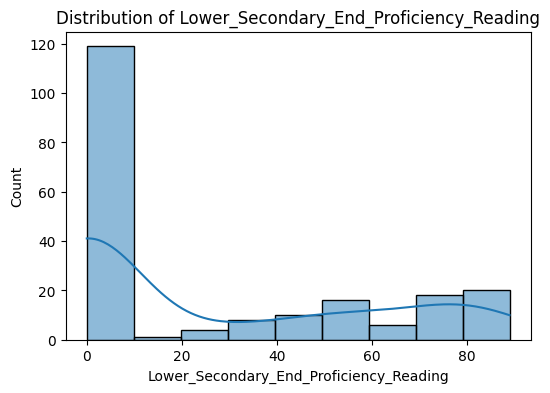

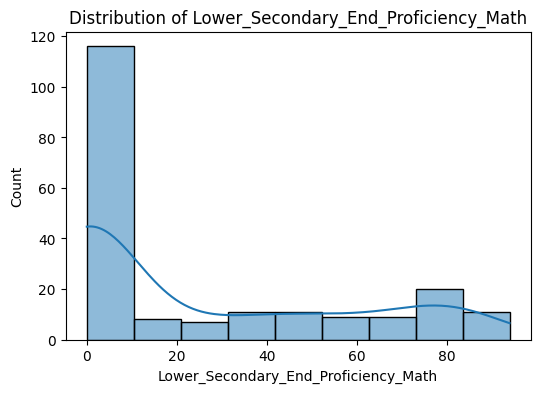

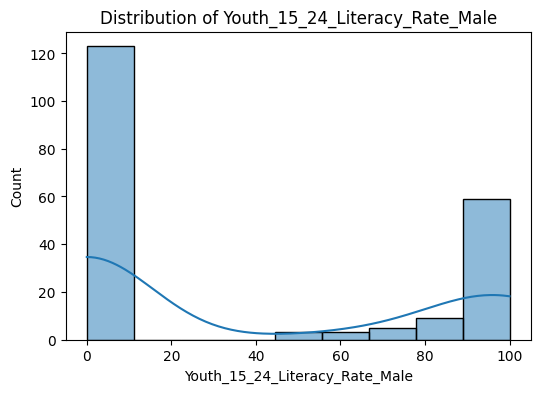

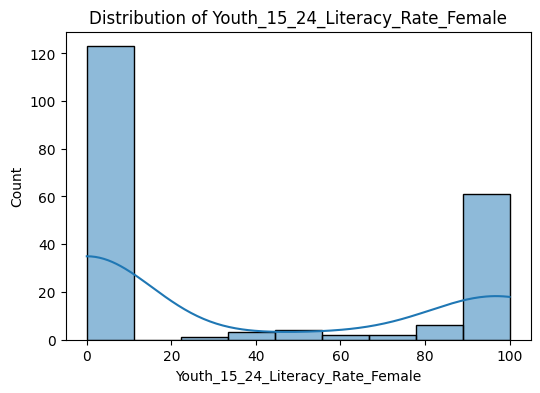

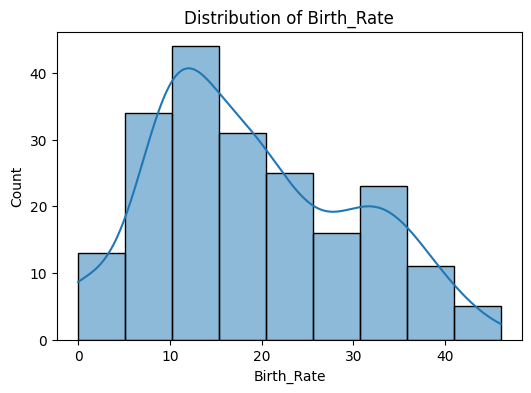

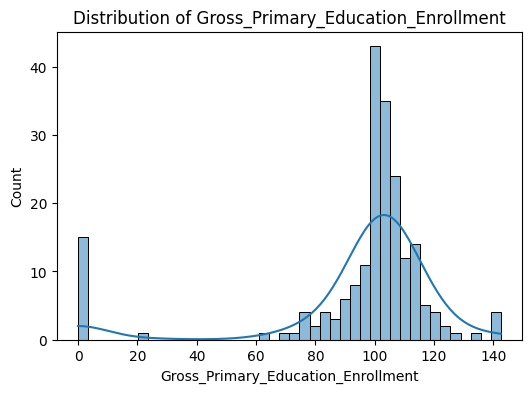

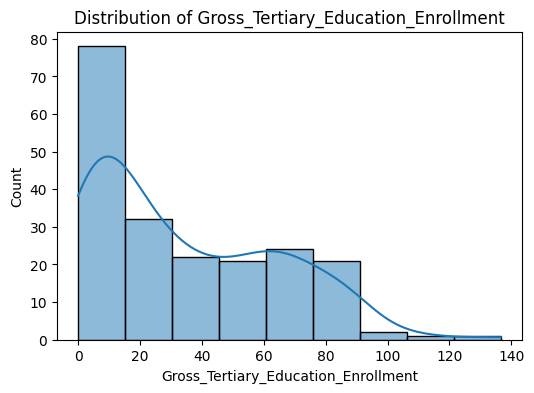

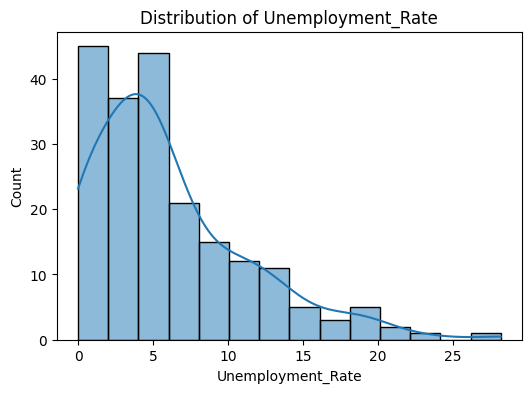

In [15]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [16]:
target_variable = 'Longitude'  

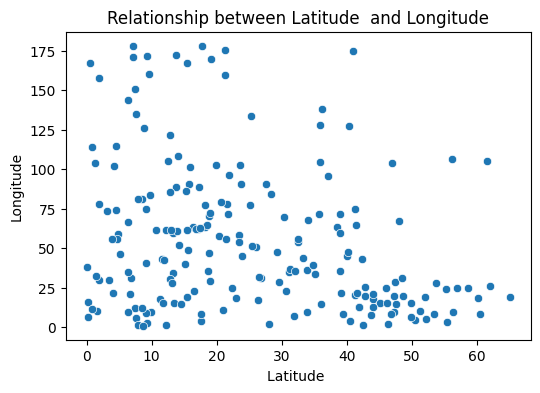

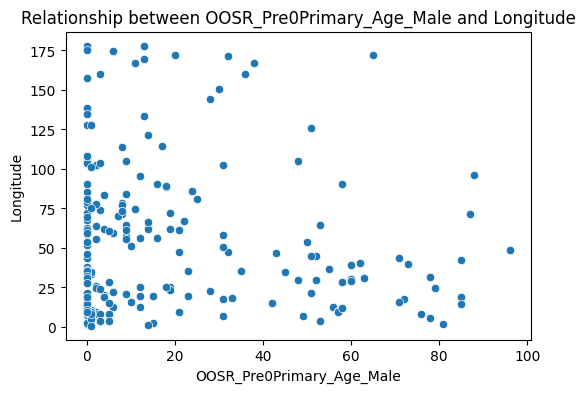

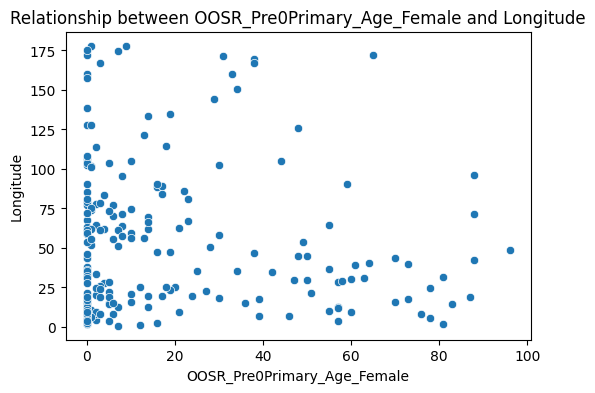

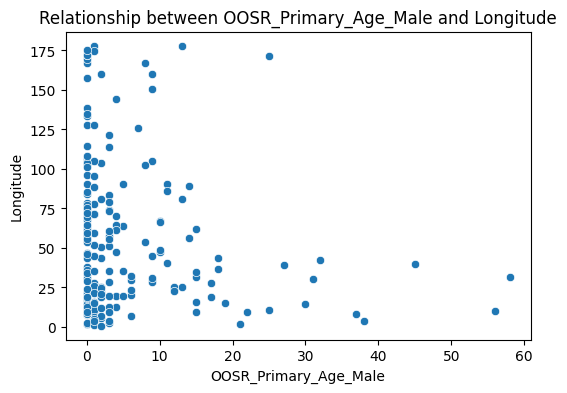

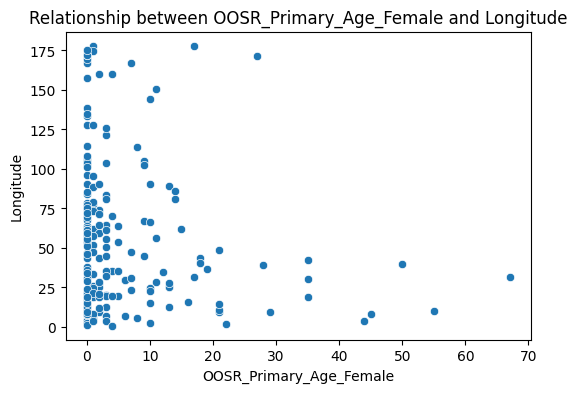

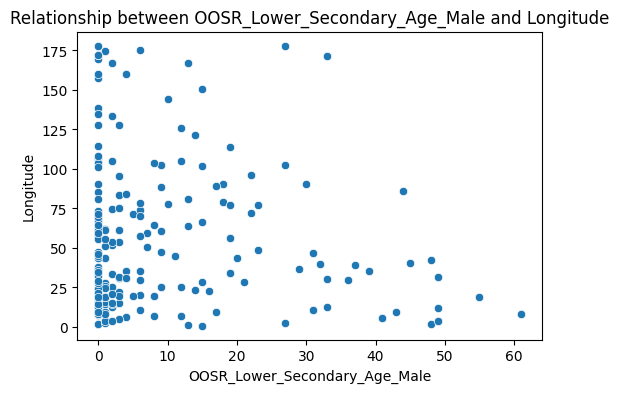

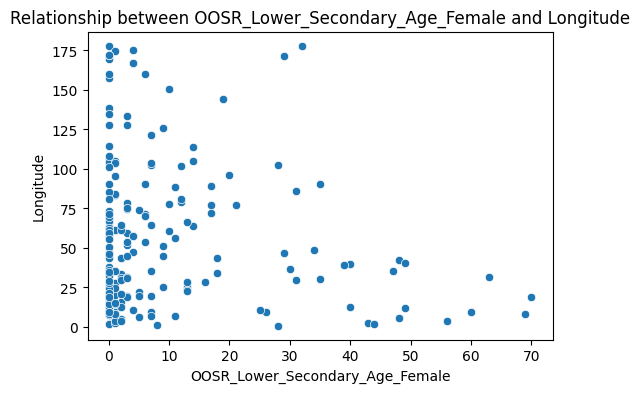

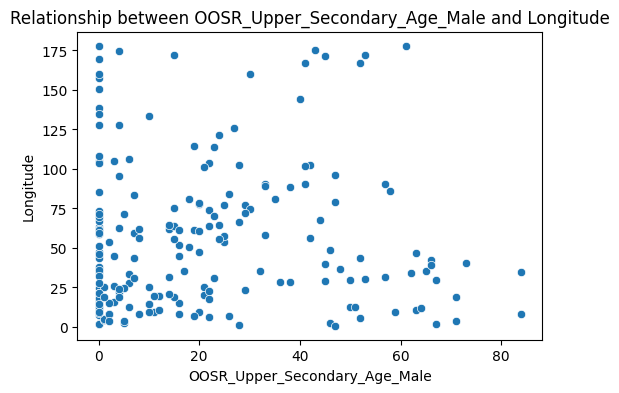

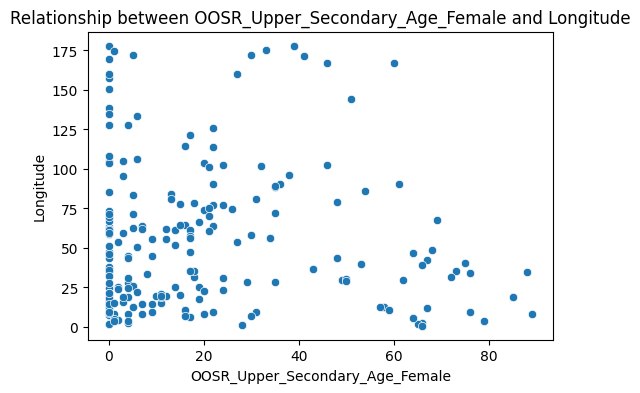

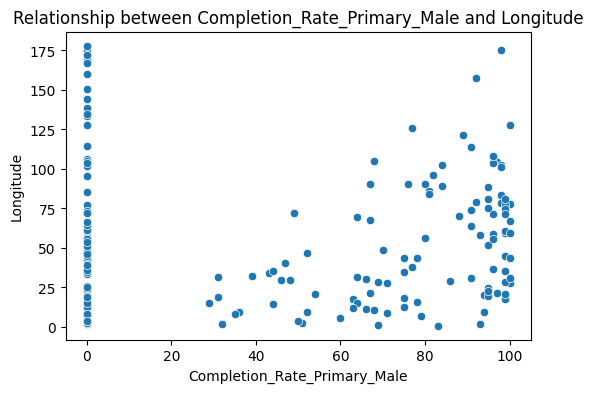

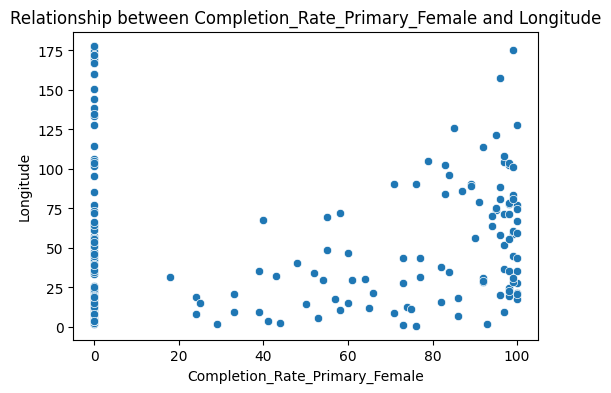

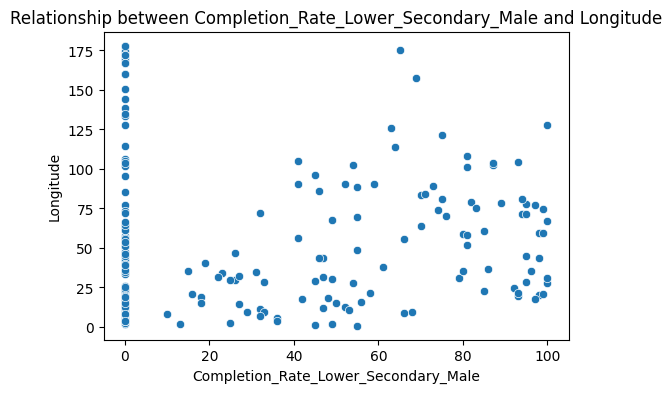

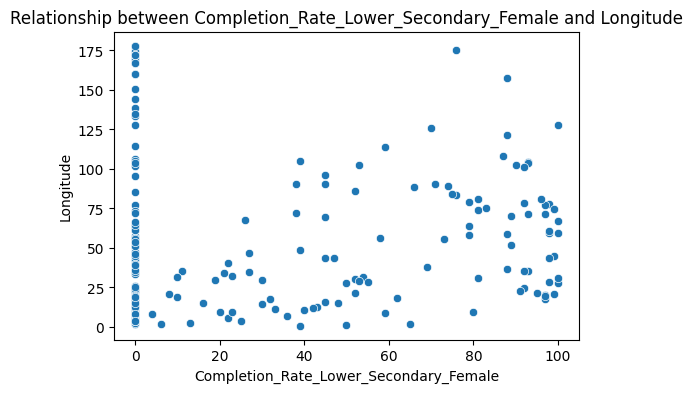

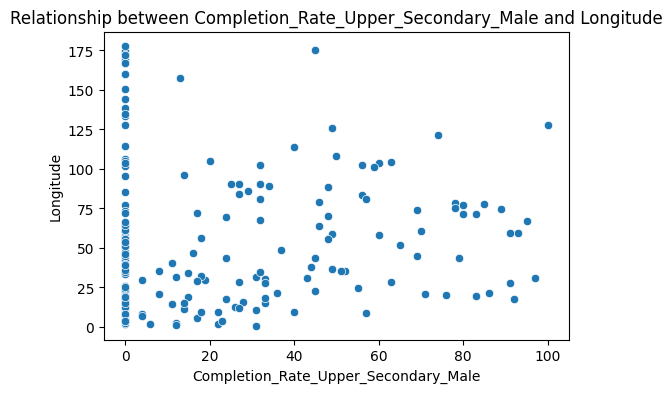

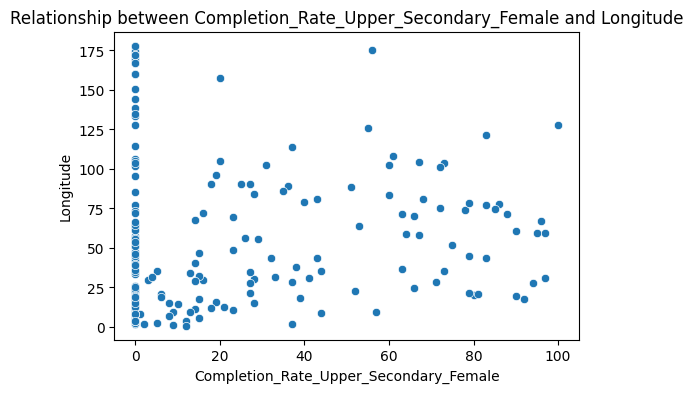

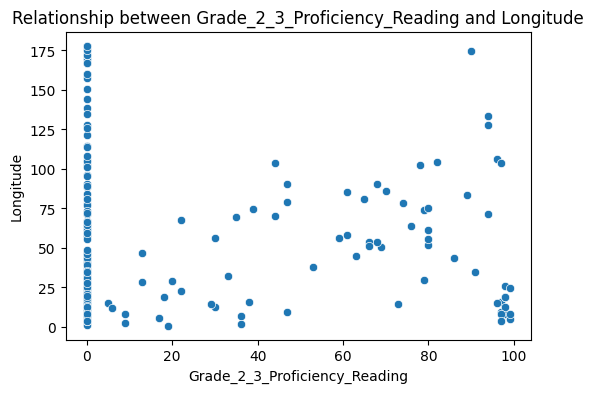

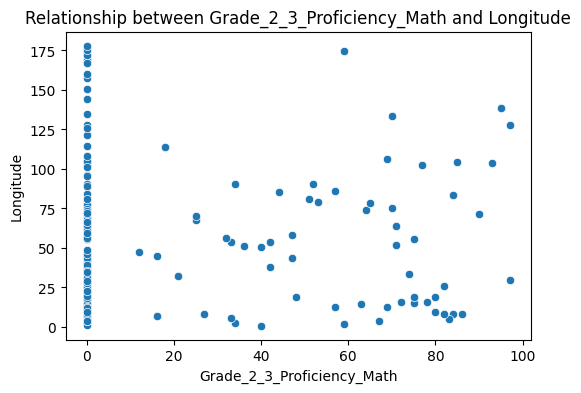

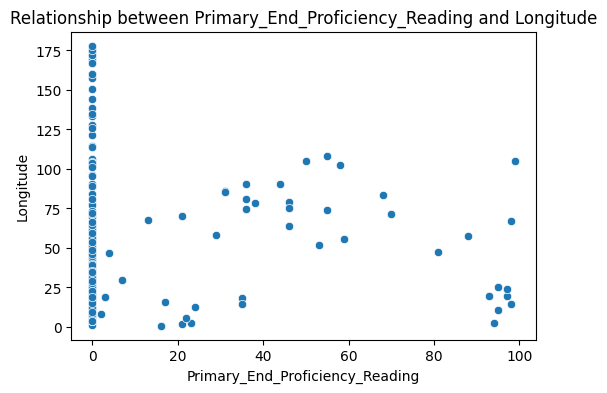

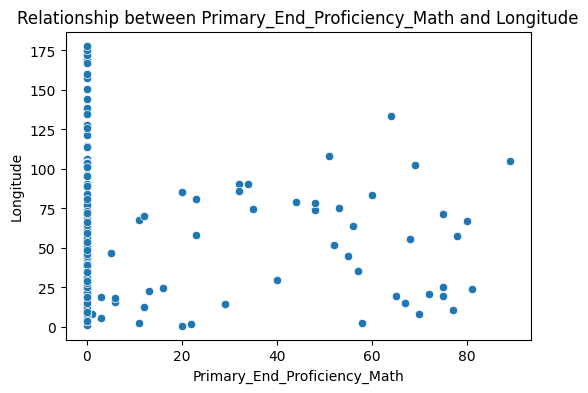

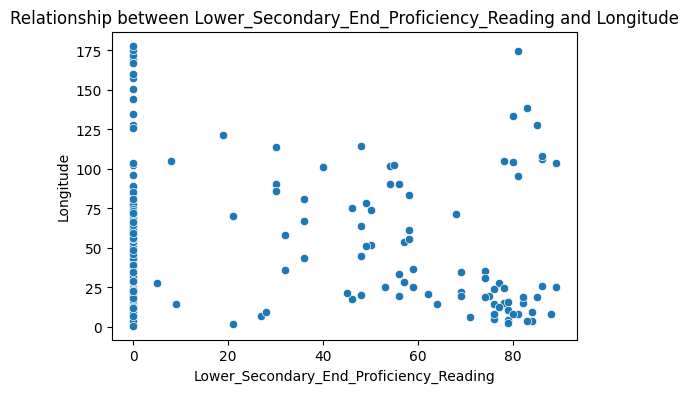

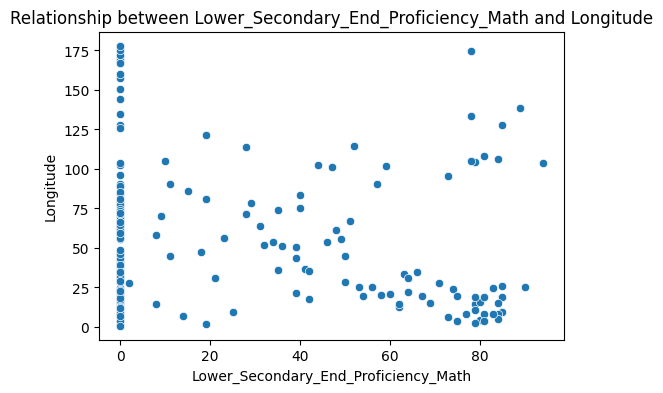

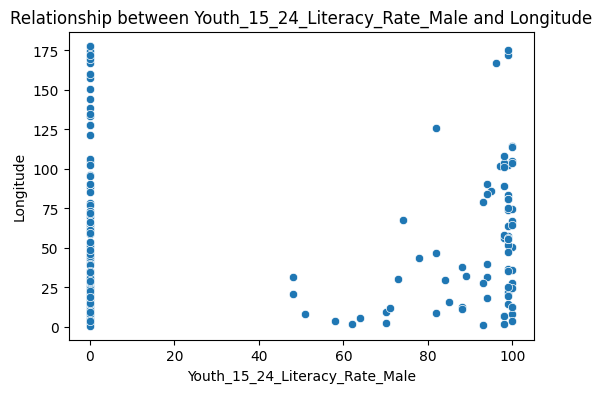

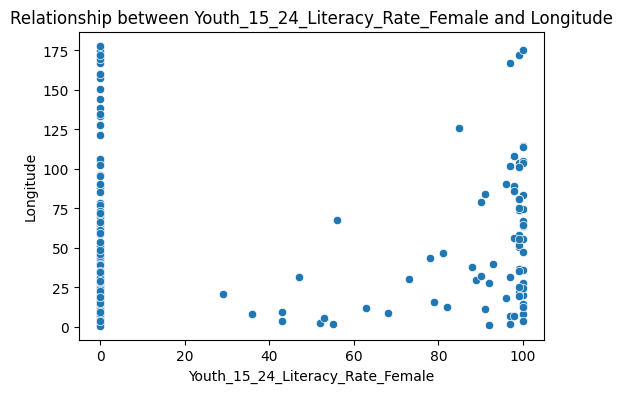

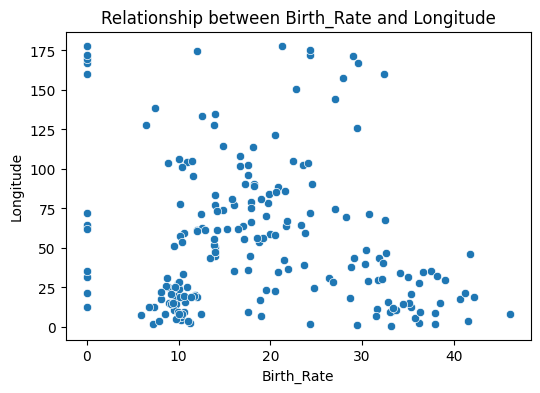

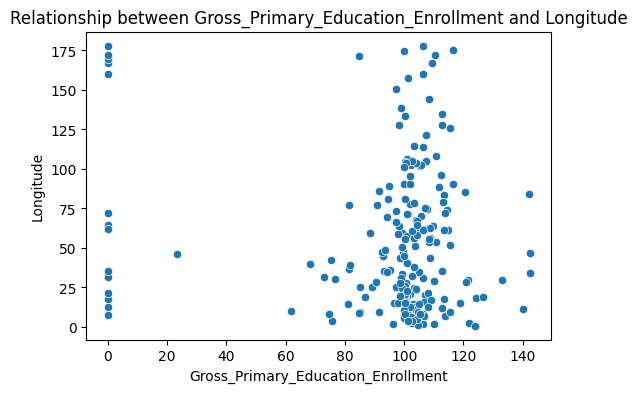

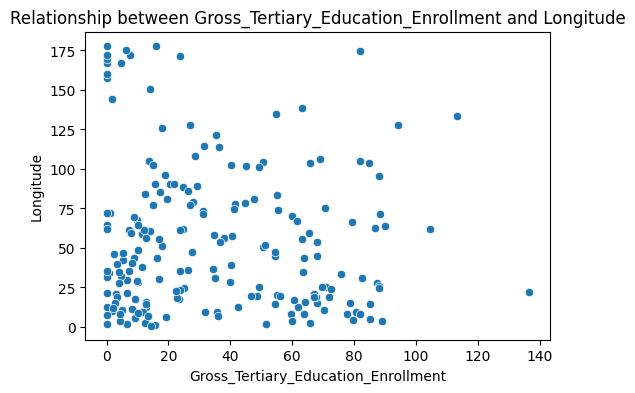

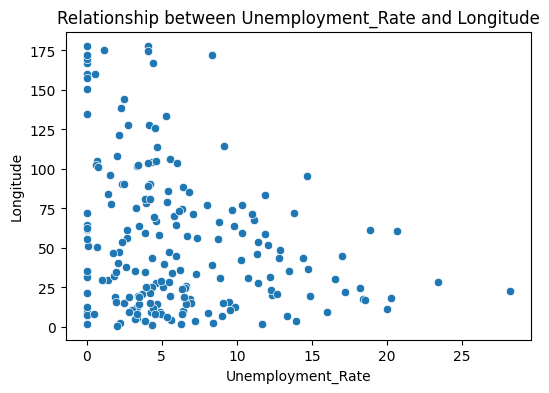

In [17]:
for col in numerical_columns:
    if col != target_variable:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df[target_variable])
        plt.title(f'Relationship between {col} and {target_variable}')
        plt.show()

In [21]:
from scipy import stats

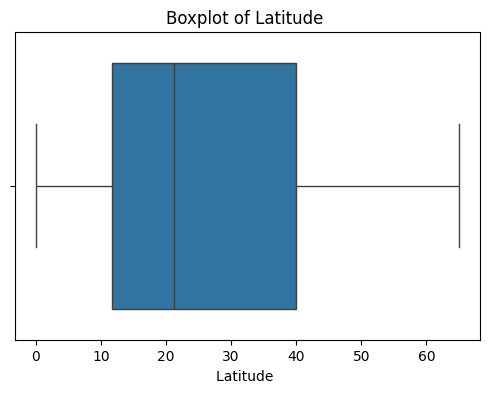

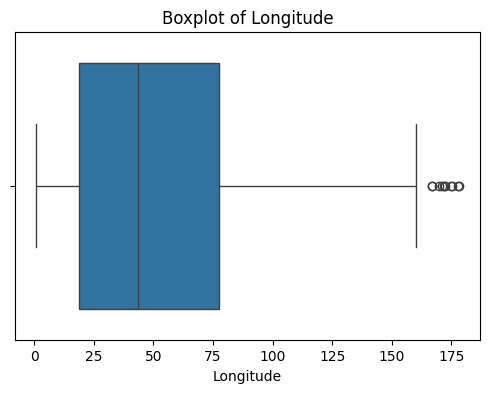

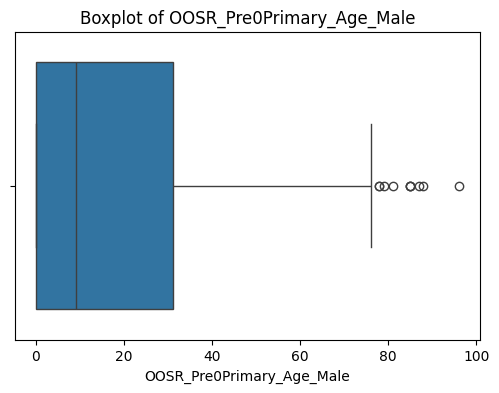

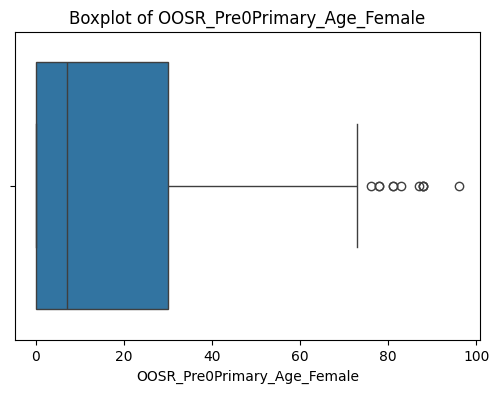

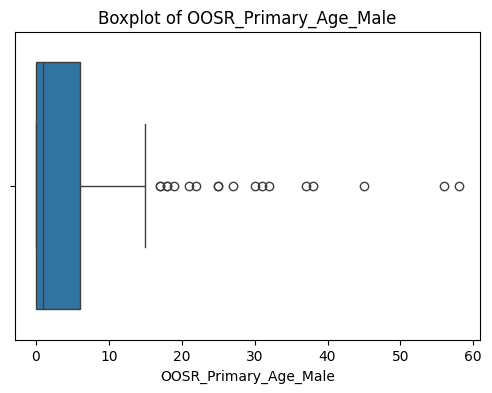

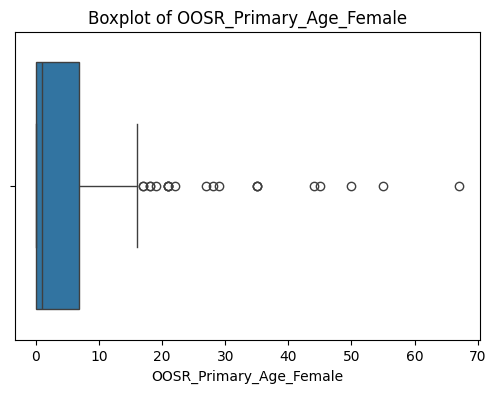

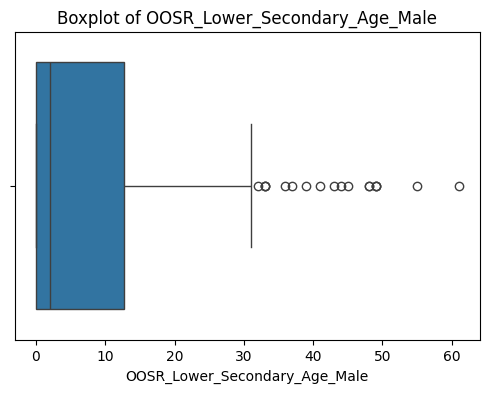

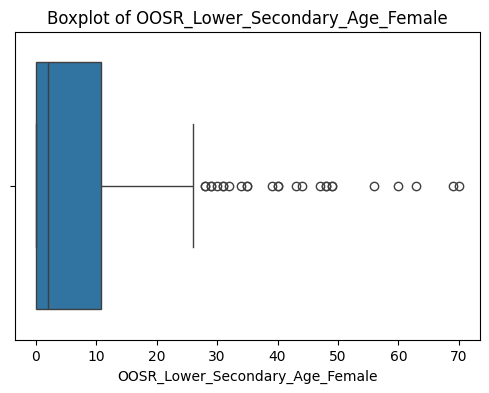

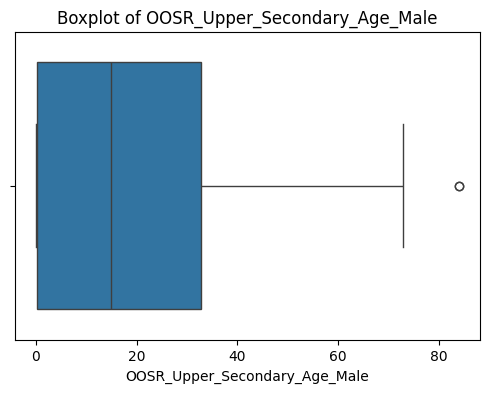

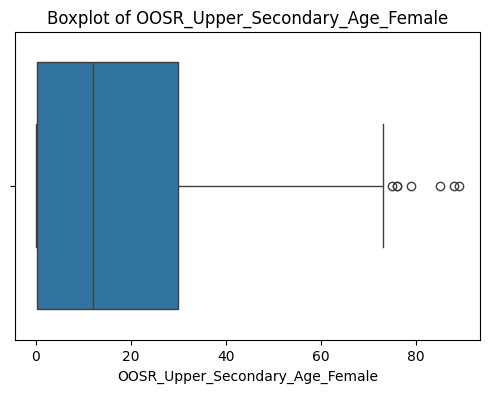

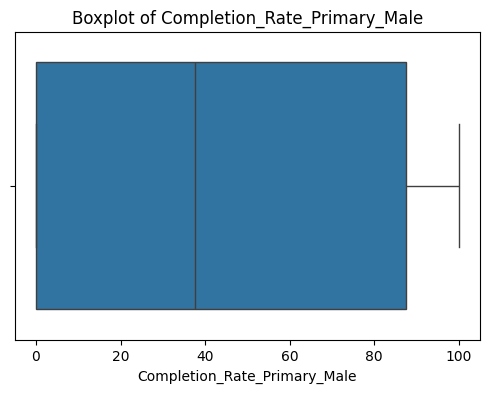

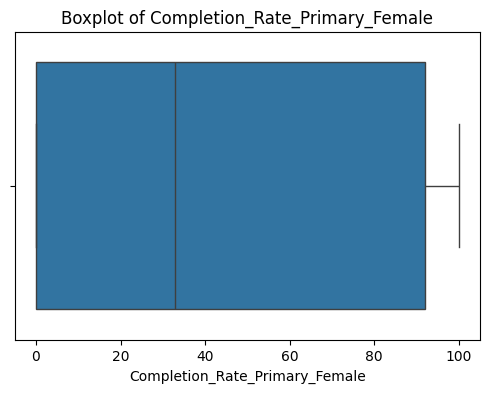

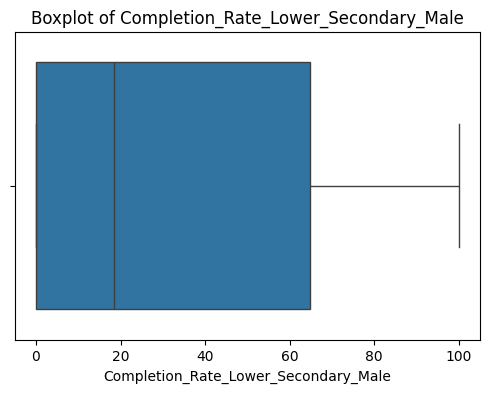

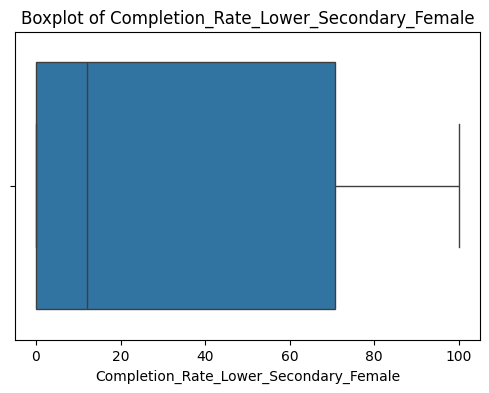

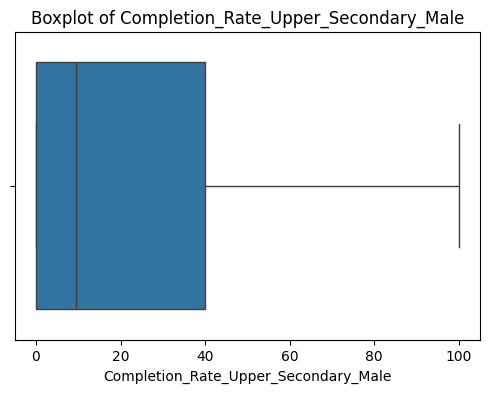

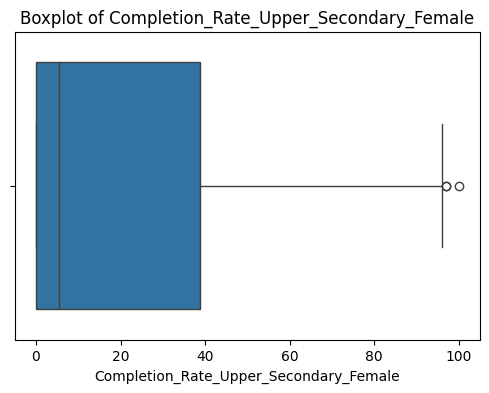

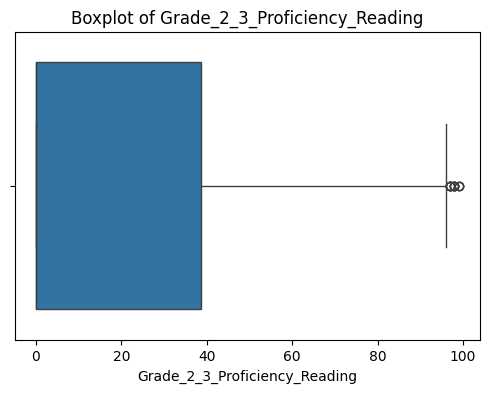

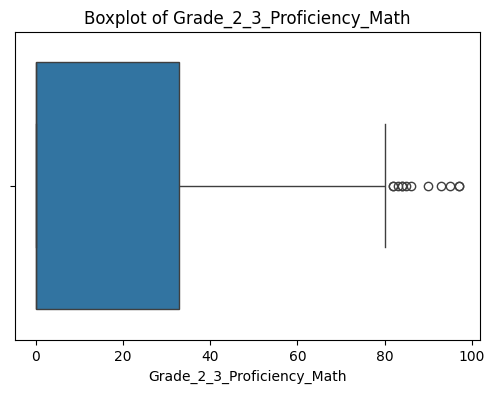

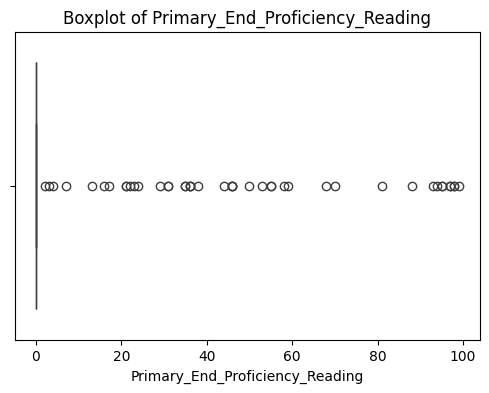

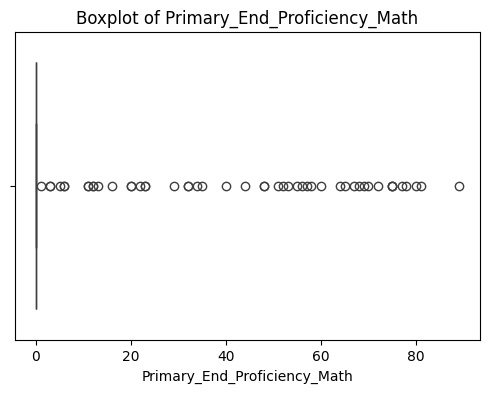

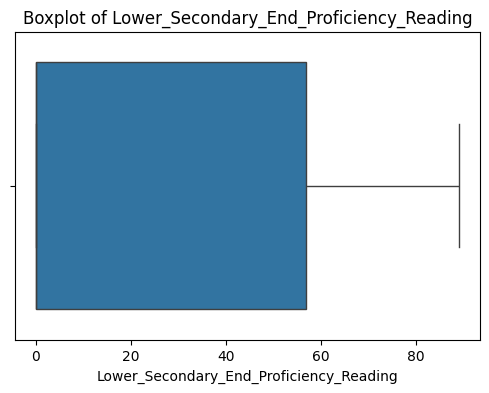

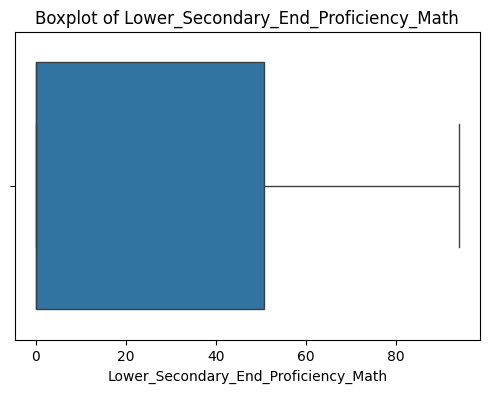

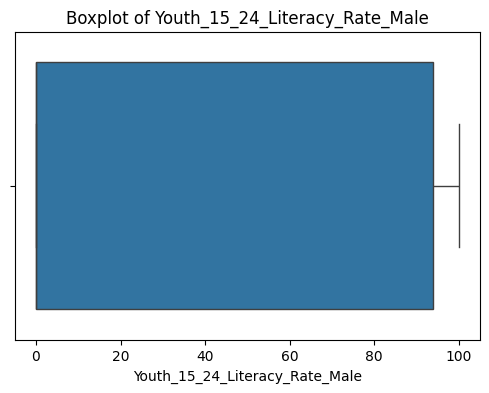

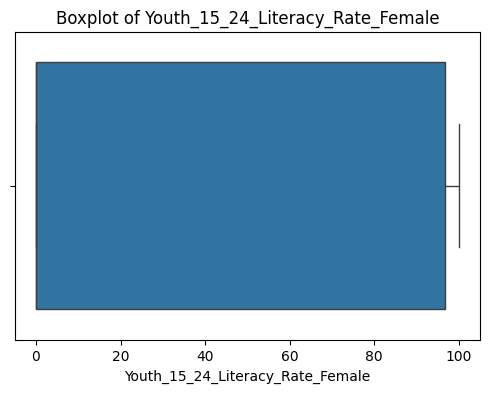

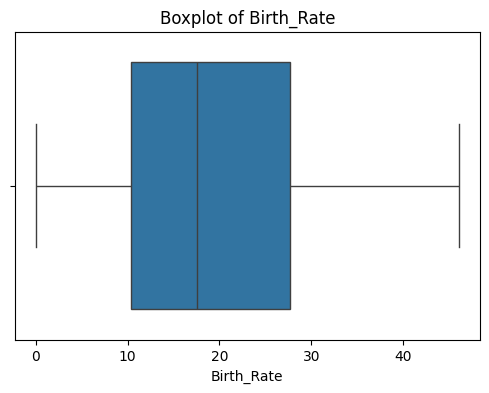

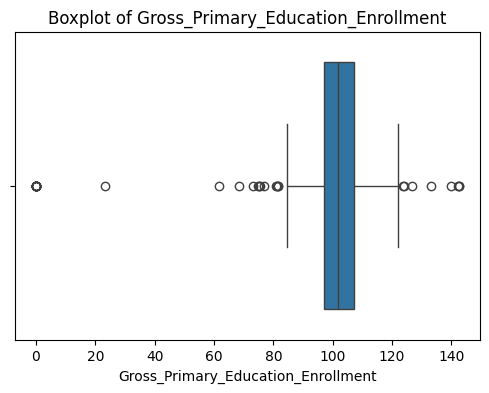

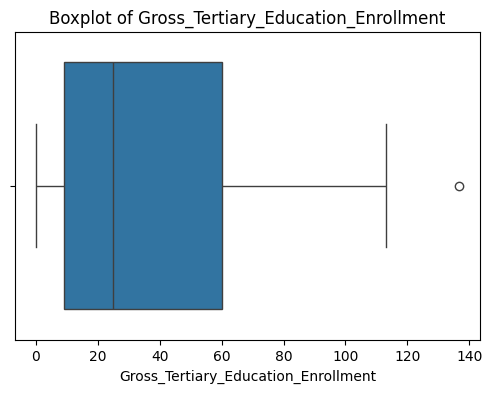

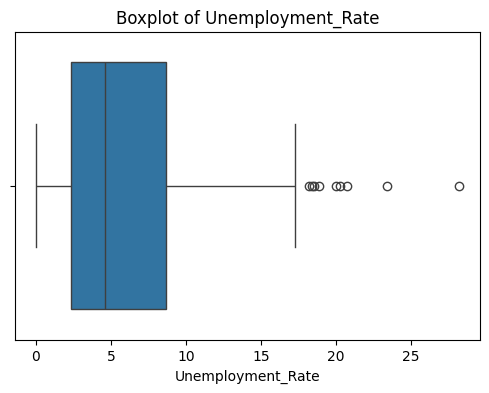

In [22]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [23]:
import numpy as np
z_scores = stats.zscore(df[numerical_columns])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
outliers_df = df[outliers]

In [24]:
print(f"Number of outliers detected: {len(outliers_df)}")
print(outliers_df)


Number of outliers detected: 37
                Countries and areas  Latitude    Longitude  \
5                          Anguilla  18.220554   63.068615   
10                          Austria  47.516231   14.550072   
22           Bosnia and Herzegovina  43.915886   17.679076   
25           British Virgin Islands  18.420695   64.639968   
27                         Bulgaria  42.733883   25.485830   
35                             Chad  15.454166   18.732207   
41                     Cook Islands  21.236736  159.777671   
57                Equatorial Guinea   1.650801   10.267895   
58                          Eritrea  15.179384   39.782334   
60                         Eswatini  26.522503   31.465866   
64                           France  46.227638    2.213749   
68                          Germany  51.165691   10.451526   
70                           Greece  39.074208   21.824312   
73                           Guinea   9.945587    9.696645   
77                     Vatican City  4

In [27]:
df['OOSR_Total_Male'] = df[['OOSR_Pre0Primary_Age_Male', 'OOSR_Primary_Age_Male', 'OOSR_Lower_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Male']].mean(axis=1)
df['OOSR_Total_Female'] = df[['OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Female']].mean(axis=1)
df['Completion_Rate_Average_Male'] = df[['Completion_Rate_Primary_Male', 'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Upper_Secondary_Male']].mean(axis=1)
df['Completion_Rate_Average_Female'] = df[['Completion_Rate_Primary_Female', 'Completion_Rate_Lower_Secondary_Female', 'Completion_Rate_Upper_Secondary_Female']].mean(axis=1)

In [28]:
df['OOSR_Total_Male'].head()

0    11.00
1     9.25
2     0.00
3     0.00
4     7.75
Name: OOSR_Total_Male, dtype: float64

In [29]:
df['OOSR_Total_Female'].head()

0    17.25
1     5.25
2     0.00
3     0.00
4     9.75
Name: OOSR_Total_Female, dtype: float64

In [30]:
df['Completion_Rate_Average_Male'].head()

0    49.333333
1    89.333333
2    54.666667
3     0.000000
4    43.000000
Name: Completion_Rate_Average_Male, dtype: float64

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Countries_and_Areas_Encoded'] = le.fit_transform(df['Countries and areas'])
df['Countries_and_Areas_Encoded'].head()

0    0
1    1
2    2
3    3
4    4
Name: Countries_and_Areas_Encoded, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [37]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[numerical_columns].head()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate,OOSR_Total_Male,OOSR_Total_Female,Completion_Rate_Average_Male,Completion_Rate_Average_Female,Countries_and_Areas_Encoded
0,0.528124,0.273493,-0.788051,-0.767946,-0.563543,-0.537715,-0.658427,-0.601276,1.106175,2.123844,...,0.463381,1.256879,0.305009,-0.825731,0.973371,-0.175212,0.250886,0.486208,-0.168975,-1.723497
1,0.958260,-0.763123,-0.627702,-0.688293,0.076583,-0.248066,-0.204752,-0.533195,0.033030,-0.215537,...,1.438180,-0.660474,0.406035,0.689121,1.203407,-0.298594,-0.534074,1.633458,1.606673,-1.706348
2,0.176036,-1.166694,-0.788051,-0.767946,-0.563543,-0.537715,-0.658427,-0.601276,-0.946797,-0.865365,...,1.371716,0.496789,0.503692,0.568736,1.083636,-0.950754,-0.877494,0.639175,0.889053,-1.689199
3,1.038928,-1.169699,-0.788051,-0.767946,-0.563543,-0.537715,-0.658427,-0.601276,-0.946797,-0.865365,...,-0.777273,-1.084495,0.385830,-1.150103,-1.140670,-0.950754,-0.877494,-0.928732,-0.904994,-1.672050
4,-0.827496,-0.813152,0.454652,0.785296,-0.563543,-0.537715,-0.658427,-0.601276,-0.946797,-0.865365,...,-0.777273,2.019747,0.624923,-0.839107,0.169199,-0.404350,-0.239714,0.304561,0.051831,-1.654901
